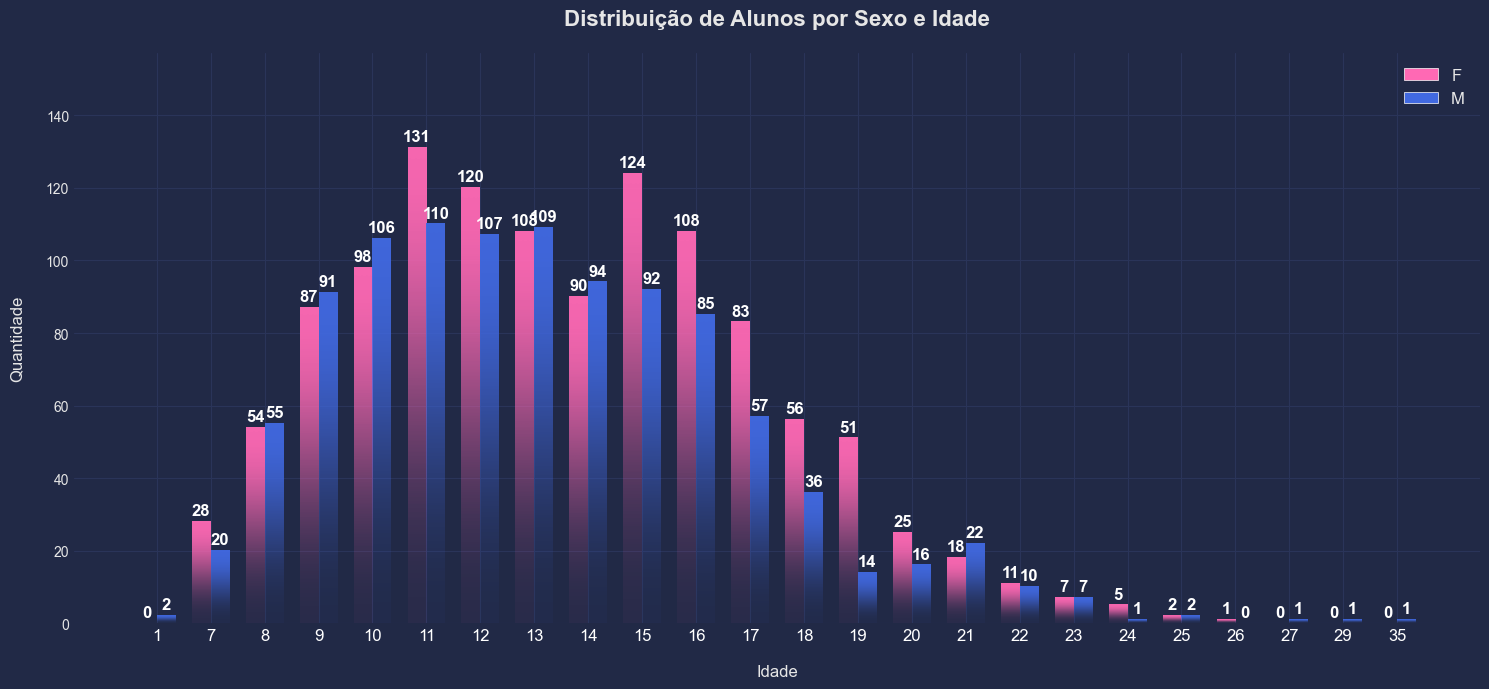

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk
import pandas as pd
from scipy.stats import pearsonr
import datetime as dt
import seaborn as sns
df2 = pd.read_csv("alunos.csv")

df2['Sexo'] = df2['Sexo'].str.strip()

grouped = df2.groupby(['Idade', 'Sexo']).size().unstack(fill_value=0)
grouped = grouped.sort_index() 


ages = grouped.index.tolist()
count_F = grouped.get('F', pd.Series(0, index=grouped.index))
count_M = grouped.get('M', pd.Series(0, index=grouped.index))


N = len(ages)
ind = np.arange(N)        
width = 0.35              

plt.style.use("cyberpunk")
fig, ax = plt.subplots(figsize=(15, 7))

bar_F = ax.bar(ind - width/2, count_F, width, label='F', color='#FF69B4',
               edgecolor='white', linewidth=0.5)
bar_M = ax.bar(ind + width/2, count_M, width, label='M', color='#4169E1',
               edgecolor='white', linewidth=0.5)

mplcyberpunk.add_bar_gradient(bars=bar_F)
mplcyberpunk.add_bar_gradient(bars=bar_M)


for bar in bar_F:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')
for bar in bar_M:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')

ax.set_title('Distribuição de Alunos por Sexo e Idade', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Idade', fontsize=12, labelpad=15)
ax.set_ylabel('Quantidade', fontsize=12, labelpad=15)
ax.set_xticks(ind)
ax.set_xticklabels(ages, fontsize=12, color='white')
ax.set_ylim(0, max(count_F.max(), count_M.max()) * 1.2)
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


In [2]:
etnia = pd.read_csv("alunos.csv", sep=",")

In [3]:
etnia["CorRaca"] = etnia["CorRaca"].str.strip()
etnia = etnia[etnia["CorRaca"] != "I"]

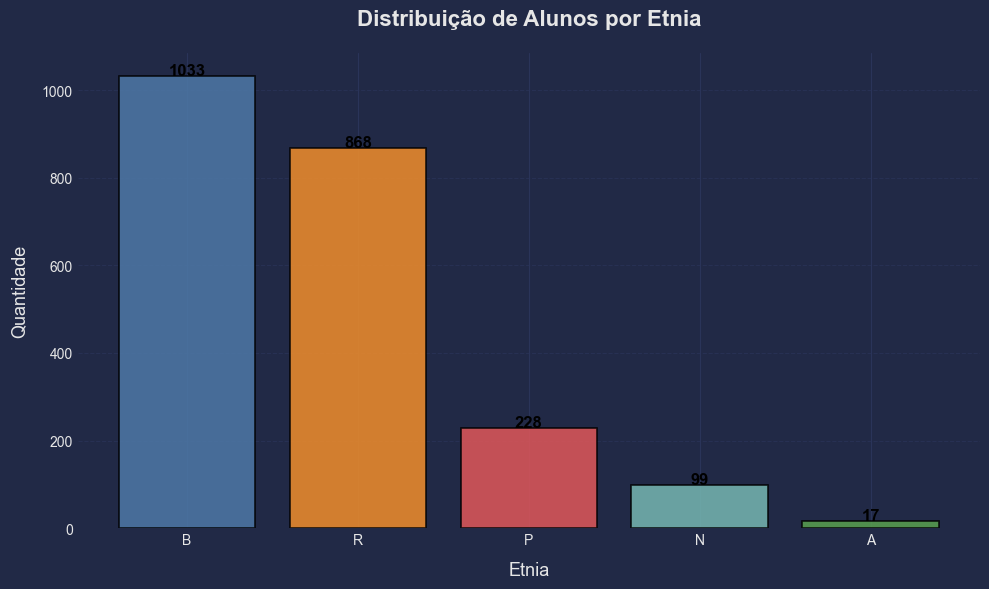

In [4]:



contagem_etnias = etnia["CorRaca"].value_counts()


cores = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']


plt.figure(figsize=(10, 6))
barras = plt.bar(contagem_etnias.index, contagem_etnias.values, color=cores[:len(contagem_etnias)], 
                 edgecolor='black', linewidth=1.2, alpha=0.85)


for barra in barras:
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 2, 
             f'{barra.get_height()}', ha='center', fontsize=12, fontweight='bold', color='black')


plt.title('Distribuição de Alunos por Etnia', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Etnia', fontsize=13, labelpad=10)
plt.ylabel('Quantidade', fontsize=13, labelpad=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [5]:
print(etnia["CorRaca"].unique()) 
print(etnia["CorRaca"].value_counts()) 

['R' 'B' 'P' 'A' 'N']
CorRaca
B    1033
R     868
P     228
N      99
A      17
Name: count, dtype: int64


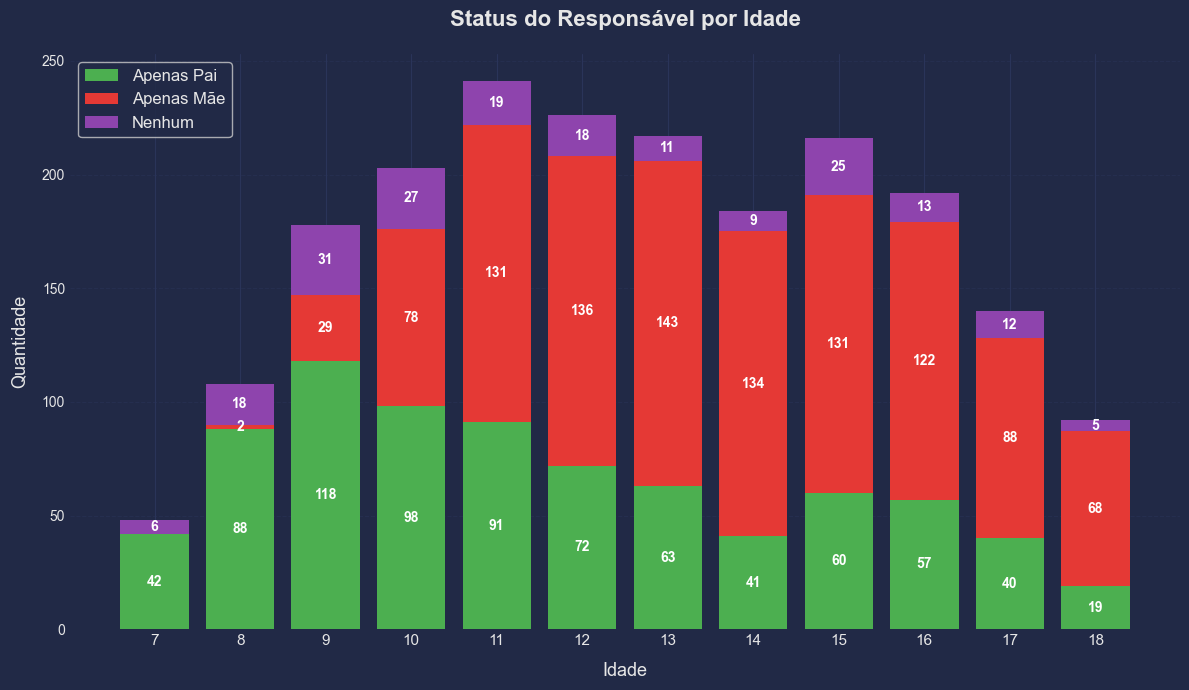

In [6]:
etnia.columns = etnia.columns.str.strip()
etnia["StatusResponsavel"] = etnia["StatusResponsavel"].str.strip()


idades_validas = etnia["Idade"].between(7, 18)
df_filtrado = etnia[idades_validas]


idades = sorted(df_filtrado["Idade"].unique())


pai = [df_filtrado[(df_filtrado["Idade"] == idade) & (df_filtrado["StatusResponsavel"] == "Apenas pai cadastrado")].shape[0] for idade in idades]
mae = [df_filtrado[(df_filtrado["Idade"] == idade) & (df_filtrado["StatusResponsavel"] == "Apenas mae cadastrada")].shape[0] for idade in idades]
nenhum = [df_filtrado[(df_filtrado["Idade"] == idade) & (df_filtrado["StatusResponsavel"] == "Nenhum cadastrado")].shape[0] for idade in idades]


cores = ['#4caf50', '#e53935', '#8e44ad']  


fig, ax = plt.subplots(figsize=(12, 7))


bar_pai = ax.bar(idades, pai, label='Apenas Pai', color=cores[0])
bar_mae = ax.bar(idades, mae, bottom=pai, label='Apenas Mãe', color=cores[1])
bar_nenhum = ax.bar(idades, nenhum, bottom=np.add(pai, mae), label='Nenhum', color=cores[2])


for bars in [bar_pai, bar_mae, bar_nenhum]:
    for bar in bars:
        altura = bar.get_height()
        if altura > 0: 
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + altura / 2, 
                    f'{int(altura)}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')


ax.set_title('Status do Responsável por Idade', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Idade', fontsize=13, labelpad=10)
ax.set_ylabel('Quantidade', fontsize=13, labelpad=10)
ax.set_xticks(idades)
ax.set_xticklabels(idades, fontsize=11)


ax.grid(axis='y', linestyle='--', alpha=0.5)


ax.legend(fontsize=12, loc='upper left', frameon=True)


plt.tight_layout()
plt.show()


In [7]:
df = pd.read_csv('alunos.csv') 

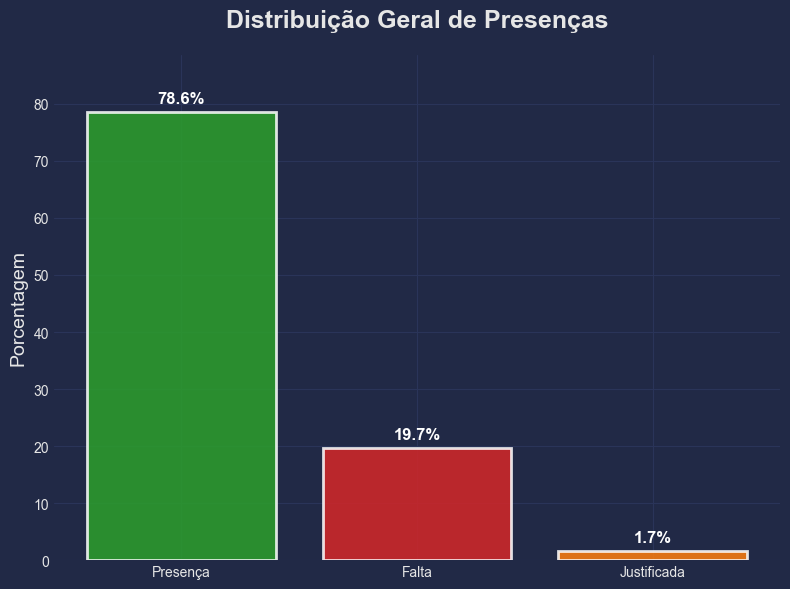

In [8]:
frequencia = pd.read_csv("frequencia_por_disciplina.csv")

frequencia['StPresencaFalta'] = frequencia['StPresencaFalta'].str.strip()

contagens = frequencia['StPresencaFalta'].value_counts()
count_P = contagens.get("P", 0)
count_F = contagens.get("F", 0)
count_J = contagens.get("J", 0)

total = count_P + count_F + count_J
perc_P = (count_P / total) * 100 if total > 0 else 0
perc_F = (count_F / total) * 100 if total > 0 else 0
perc_J = (count_J / total) * 100 if total > 0 else 0

labels = ['Presença', 'Falta', 'Justificada']
values = [perc_P, perc_F, perc_J]
colors = ['#2ca02c', '#d62728', '#ff7f0e']

plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, values, color=colors, edgecolor='white', linewidth=2, alpha=0.85)

for bar in bars:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        altura + 1, 
        f'{altura:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='white'
    )

ax.set_title('Distribuição Geral de Presenças', fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel('Porcentagem', fontsize=14)
ax.set_ylim(0, max(values) + 10)
mplcyberpunk.add_glow_effects()  

plt.tight_layout()
plt.show()

In [9]:
print(etnia["CorRaca"].unique())  # Ver todas as categorias
print(etnia["CorRaca"].value_counts()) 

['R' 'B' 'P' 'A' 'N']
CorRaca
B    1033
R     868
P     228
N      99
A      17
Name: count, dtype: int64


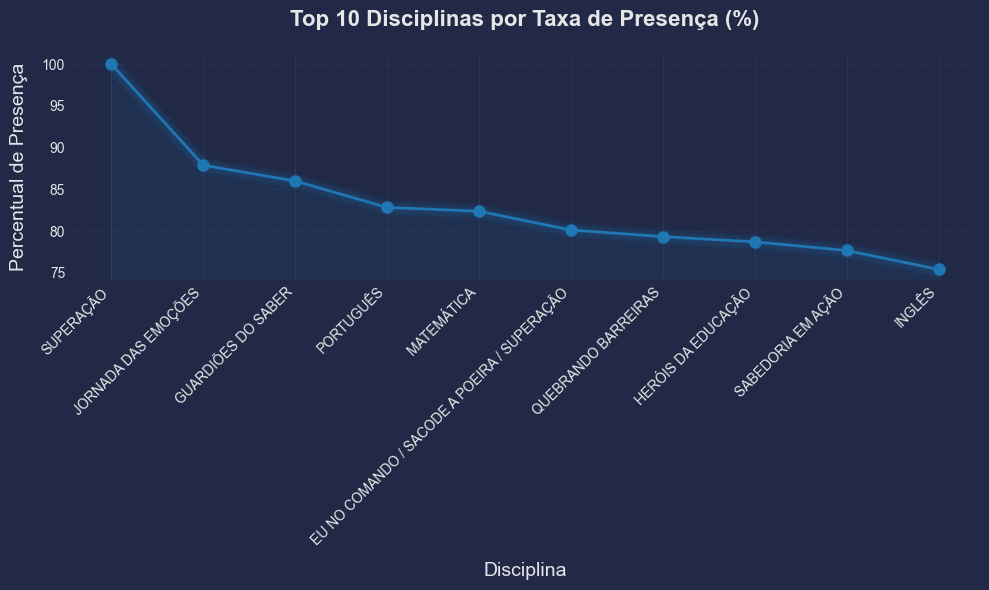

In [10]:
frequencia['StPresencaFalta'] = frequencia['StPresencaFalta'].str.strip()

grouped = frequencia.groupby('NomeDisciplina')['StPresencaFalta'].value_counts().unstack(fill_value=0)

presence_percent = {}
for disciplina, row in grouped.iterrows():
    total = row.sum()
    count_P = row.get("P", 0)
    percent = (count_P / total * 100) if total > 0 else 0
    presence_percent[disciplina] = percent

sorted_presence = sorted(presence_percent.items(), key=lambda x: x[1], reverse=True)
top10 = sorted_presence[:10]
top10_disciplines = [item[0] for item in top10]
top10_percentages = [item[1] for item in top10]

plt.style.use("cyberpunk")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(top10_disciplines, top10_percentages, marker='o', linestyle='-', 
        color='#1f77b4', linewidth=2, markersize=8)

ax.set_title('Top 10 Disciplinas por Taxa de Presença (%)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Disciplina', fontsize=14, labelpad=10)
ax.set_ylabel('Percentual de Presença', fontsize=14, labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

mplcyberpunk.add_glow_effects()

plt.tight_layout()
plt.show()

In [11]:
DiarioAluno = pd.read_csv('TbDiarioAluno.csv')
Diario = pd.read_csv('TbDiario.csv')
DiarioFrequencia = pd.read_csv('TbDiarioFrequencia.csv')
Disciplina = pd.read_csv('TbDisciplina.csv')
DiarioAula = pd.read_csv('TbDiarioAula.csv')

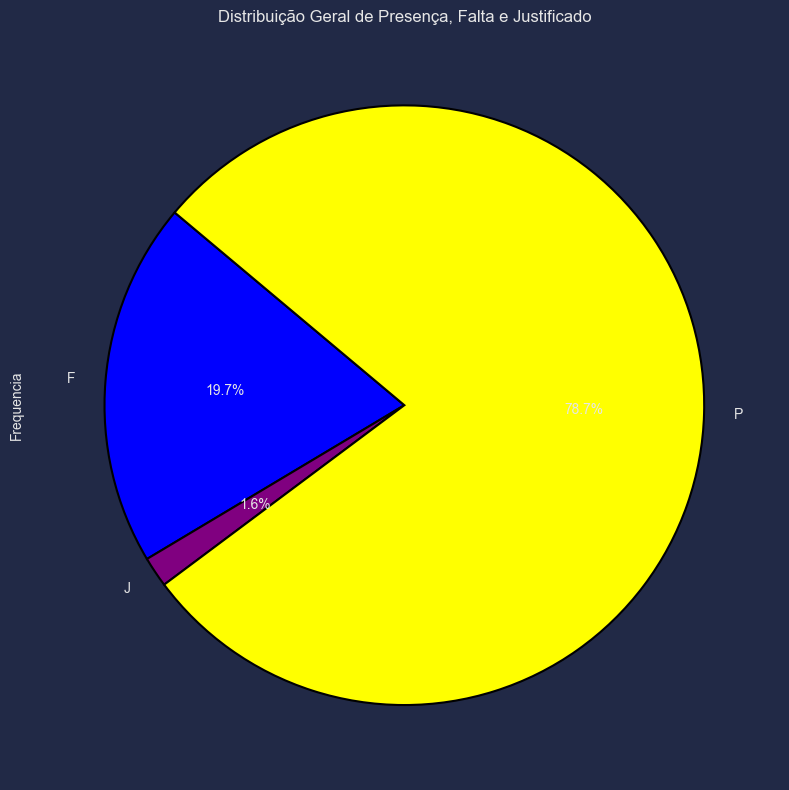

In [12]:
# Associar alunos aos diários e aulas
aluno_diario_aula = pd.merge(DiarioAluno, DiarioAula, left_on='IdDiario', right_on='IdDiario')

# Relacionar os diários com as disciplinas
aluno_diario_disciplina = pd.merge(aluno_diario_aula, Diario, on='IdDiario')

# Obter a frequência dos alunos nas disciplinas através de IdDiarioAula
aluno_frequencia = pd.merge(aluno_diario_disciplina, DiarioFrequencia, on=['IdAluno', 'IdDiarioAula'])

# Incluir a coluna NomeDisciplina na tabela aluno_frequencia
aluno_frequencia_completa = pd.merge(aluno_frequencia, Disciplina[['IdDisciplina', 'NomeDisciplina']], on='IdDisciplina')

# Agregar os dados de presença, falta e justificativa independentemente da disciplina
frequencia_geral = aluno_frequencia_completa.groupby('StPresencaFalta').size()

# Criar o gráfico de pizza para presença, falta e justificado
plt.figure(figsize=(8, 8))
frequencia_geral.plot(kind='pie',
                      autopct='%1.1f%%',
                      colors=['blue', 'purple', 'yellow'],
                      startangle=140,
                      wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

plt.title('Distribuição Geral de Presença, Falta e Justificado')
plt.ylabel('Frequencia')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [13]:
# Associar alunos aos diários e aulas
aluno_diario_aula = pd.merge(DiarioAluno, DiarioAula, left_on='IdDiario', right_on='IdDiario')

# Relacionar os diários com as disciplinas e turmas
aluno_diario_turma = pd.merge(aluno_diario_aula, Diario, on='IdDiario')

aluno_frequencia_turma = pd.merge(aluno_diario_turma, DiarioFrequencia, on=['IdAluno', 'IdDiarioAula'])

# Filtrar apenas as presenças para calcular a media de frequência por turma
frequencia_por_turma = aluno_frequencia_turma[aluno_frequencia_turma['StPresencaFalta'] == 'P'].groupby('IdTurma').size()

# Exibir a frequência por turma
frequencia_por_turma.sort_values(ascending=False).head(10)

IdTurma
504    1384
492    1378
251    1351
501    1291
582    1273
190    1260
208    1256
480    1252
521    1243
476    1231
dtype: int64

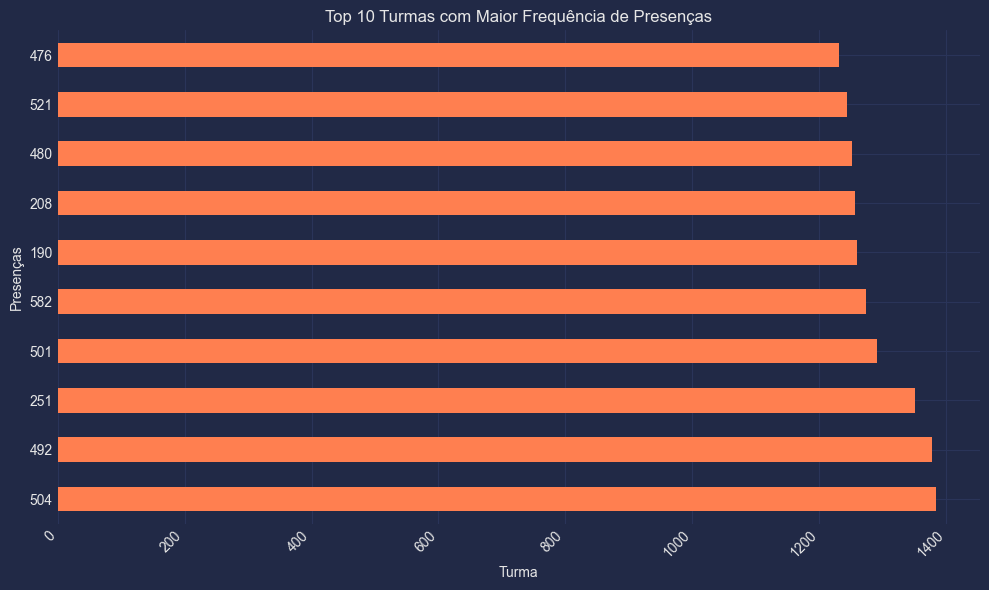

In [14]:
plt.figure(figsize=(10, 6))
frequencia_por_turma.sort_values(ascending=False).head(10).plot(kind='barh', color='coral')

plt.title('Top 10 Turmas com Maior Frequência de Presenças')
plt.xlabel('Turma')
plt.ylabel('Presenças')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [15]:
Aluno = pd.read_csv('tbAluno.csv')

In [16]:
# Juntar as informações de alunos com a frequência
frequencia_por_sexo = pd.merge(aluno_frequencia_turma, Aluno[['IdAluno', 'Sexo']], on='IdAluno')

# Filtrar apenas as presenças e calcular a frequência por sexo
frequencia_por_sexo_agg = frequencia_por_sexo[frequencia_por_sexo['StPresencaFalta'] == 'P'].groupby('Sexo').size()

frequencia_por_sexo_agg

Sexo
F    134266
M    111863
dtype: int64

C:\Users\da\AppData\Local\Temp\ipykernel_30708\3883782644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frequencia_por_sexo_agg.index,


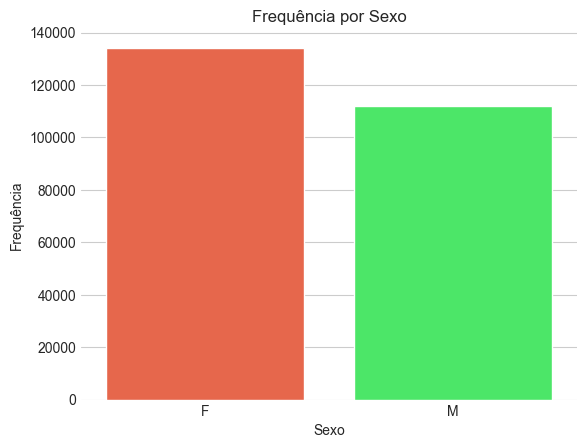

In [17]:
sns.set_style("whitegrid")
ax = sns.barplot(x=frequencia_por_sexo_agg.index,
                 y=frequencia_por_sexo_agg.values,
                 palette=['#FF5733', '#33FF57'])  # Vermelho e verde

ax.set_xlabel("Sexo")
ax.set_ylabel("Frequência")
ax.set_title("Frequência por Sexo")

plt.show()

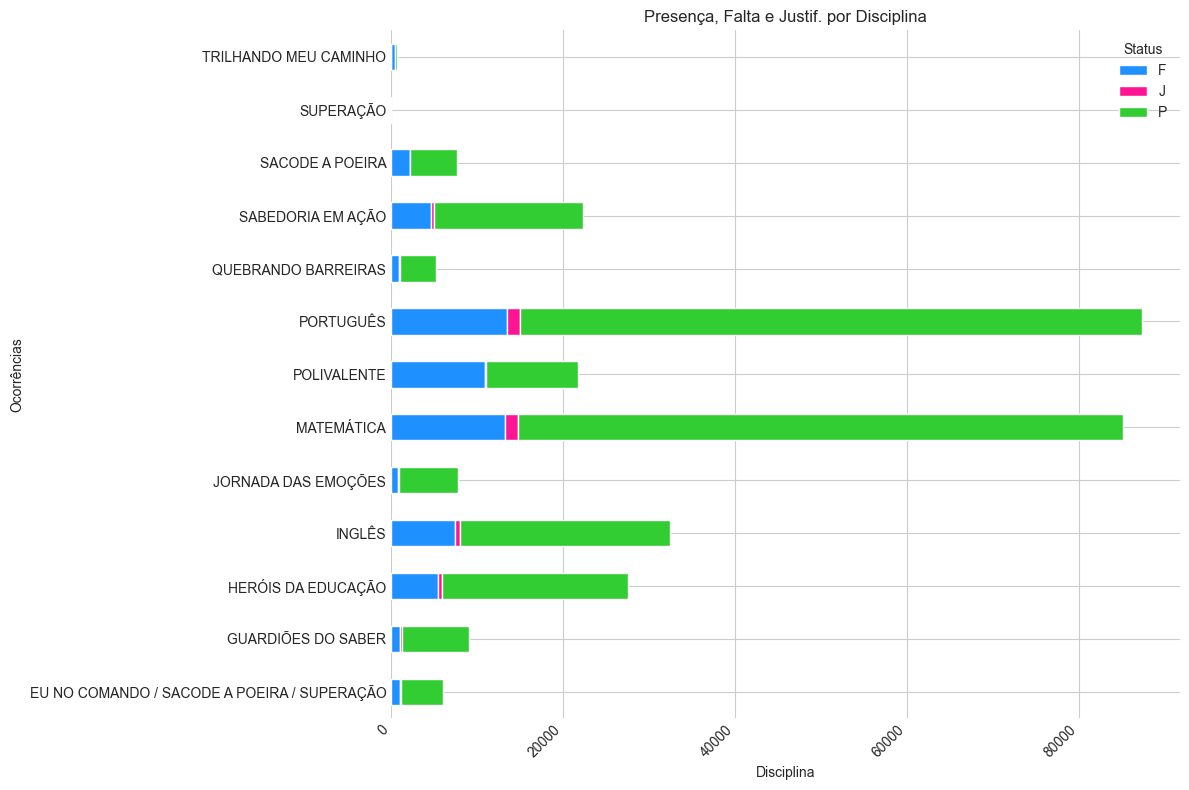

In [18]:
# Associar os dados de presença, falta e justificativa por disciplina
frequencia_por_disciplina = aluno_frequencia_completa.groupby(['NomeDisciplina', 'StPresencaFalta']).size().unstack(fill_value=0)

# Criar o gráfico
frequencia_por_disciplina.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#1E90FF', '#FF1493', '#32CD32'])

plt.title('Presença, Falta e Justif. por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status', loc='upper right')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [19]:
# Função para classificar o status do responsável
def class_respons(row):
    if pd.notnull(row['IdPai']) and pd.notnull(row['IdMae']):
        return 'Ambos Cadastros'
    elif pd.notnull(row['IdMae']) and pd.isnull(row['IdPai']):
        return 'Apenas mae cadastrada'
    elif pd.isnull(row['IdMae']) and pd.notnull(row['IdPai']):
        return 'Apenas pai cadastrado'
    else:
        return 'Nenhum cadastrado'

# Aplicando a função para criar a nova coluna 'StatusResponsavel'
Aluno['StatusResponsavel'] = Aluno.apply(class_respons, axis=1)

# Filtrando um caso onde a data esta corrompida da base
Aluno = Aluno[~(Aluno.DataNascimento.str.contains('M'))]

# Vericando data de nascimento e idade de cada um dos alunos atualmente
Aluno['DataNascimento'] = pd.to_datetime(Aluno['DataNascimento'], errors='ignore')

# A subtração das datas foi feita, e o resultado foi dividido por 365 para converter de dias para anos (idade).
Aluno['Idade'] = (dt.date.today() - Aluno['DataNascimento'].dt.date).apply(lambda x: x.days // 365)

# Printando os dados para analisarmos
Aluno[['IdAluno','DataNascimento', 'Idade']].drop_duplicates().reset_index(drop=True)

# Criando base aluno resumida
AlunoResumo = Aluno[['IdAluno','Sexo','Idade','DataNascimento','CorRaca','StatusResponsavel']].drop_duplicates()

C:\Users\da\AppData\Local\Temp\ipykernel_30708\2122804021.py:19: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  Aluno['DataNascimento'] = pd.to_datetime(Aluno['DataNascimento'], errors='ignore')


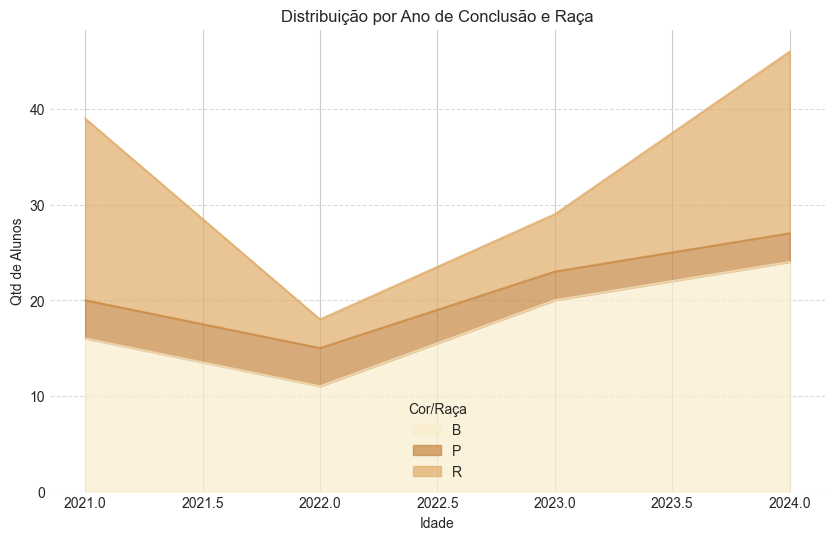

In [20]:
# Carregar Historico
Historico = pd.read_csv('tbHistorico.csv')

# Associando informações dos alunos com historico
Central = pd.merge(
    AlunoResumo,
    Historico[['IdAluno','AnoConclusao','ResultadoFinal']],
    how='left',
    on='IdAluno'
)

#### Grafico de conclusao por etinia
# Definindo cores personalizadas para cada categoria de CorRaca
colors = {
    'B': '#F9EDCC',  # Tom claro
    'R': '#E0AC69',  # Tom médio
    'P': '#C68642',  # Tom médio escuro
    'N': '#8D5524',  # Tom escuro
    'A': '#734222',  # Tom muito escuro
    'I': '#4B3621'   # Tom específico ou muito escuro
}
# Agrupando os dados por idade e cor/raca e contando a quantidade de alunos
df_grouped = Central.groupby(['AnoConclusao', 'CorRaca']).size().unstack(fill_value=0)

# Criando o gráfico de barras empilhadas
df_grouped.plot(kind='area', stacked=True, figsize=(10, 6), color=[colors[col] for col in df_grouped.columns], alpha=0.7)

plt.xlabel('Idade')
plt.ylabel('Qtd de Alunos')
plt.title('Distribuição por Ano de Conclusão e Raça')
plt.legend(title='Cor/Raça')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

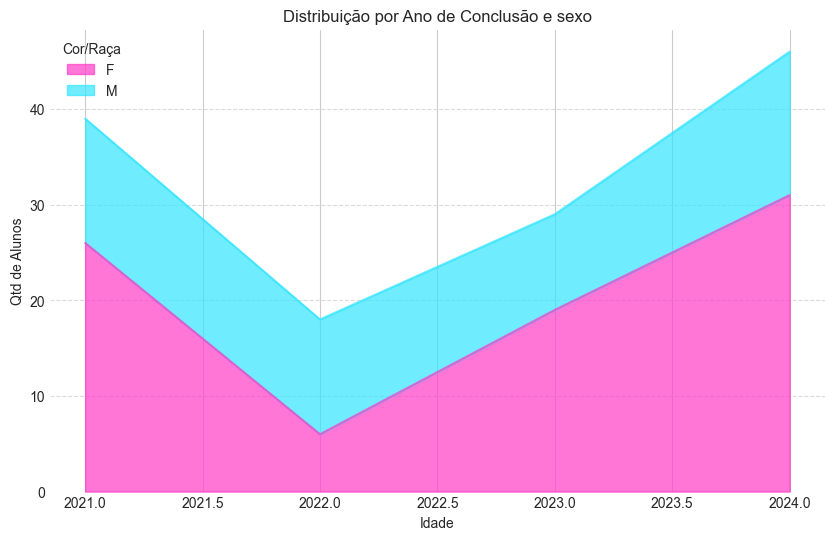

In [21]:
#### Grafico de conclusao por sexo
# Definindo cores personalizadas para cada categoria de Sexo
colors = {
    'M': '#34E5FF',
    'F': '#FF3CC7'
}

# Agrupando os dados por idade e cor/raca e contando a quantidade de alunos
df_grouped = Central.groupby(['AnoConclusao', 'Sexo']).size().unstack(fill_value=0)

# Criando o gráfico de barras empilhadas
df_grouped.plot(kind='area', stacked=True, figsize=(10, 6), color=[colors[col] for col in df_grouped.columns], alpha=0.7)

plt.xlabel('Idade')
plt.ylabel('Qtd de Alunos')
plt.title('Distribuição por Ano de Conclusão e sexo')
plt.legend(title='Cor/Raça')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

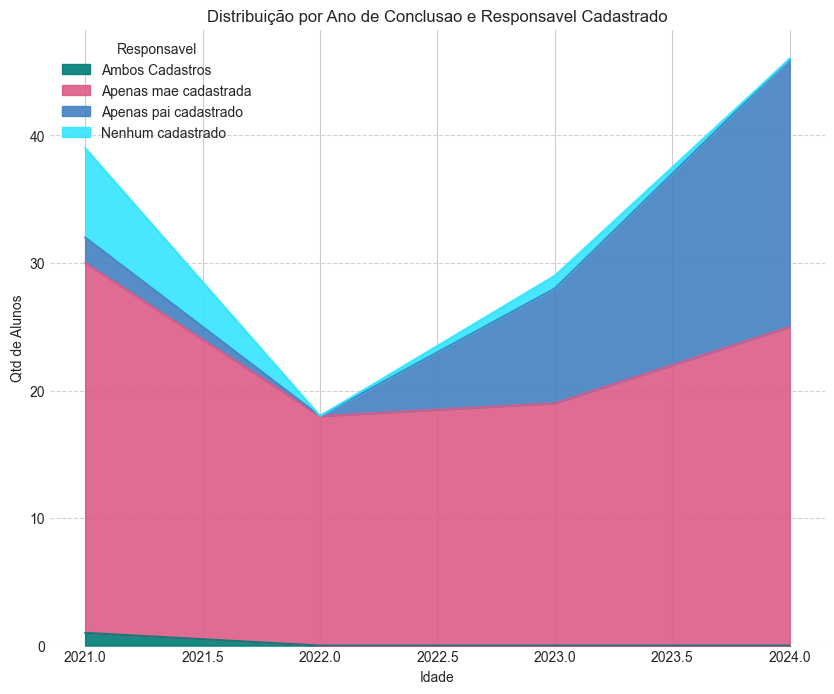

In [22]:
#### Grafico de conclusao por responsavel
colors = {
    'Apenas mae cadastrada': '#DD5B87',
    'Apenas pai cadastrado': '#4381C1',
    'Nenhum cadastrado': '#34E5FF',
    'Ambos Cadastros': '#007C77'
}

df_grouped = Central.groupby(['AnoConclusao', 'StatusResponsavel']).size().unstack(fill_value=0)

df_grouped.plot(kind='area', stacked=True, figsize=(10, 8), color=[colors[col] for col in df_grouped.columns], alpha=0.9)

plt.xlabel('Idade')
plt.ylabel('Qtd de Alunos')
plt.title('Distribuição por Ano de Conclusao e Responsavel Cadastrado')
plt.legend(title='Responsavel')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()